# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [145]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import sys

### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
df.shape #returns the rows, columns of the data

(1898, 9)

#### Observations:
(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
df.info() #info about the dataframe, including the datatypes for the various columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

 1   customer_id          
 2   restaurant_name
 3   cuisine_type            
 4   cost_of_the_order      
 5   day_of_the_week        
 6   rating                 
 7   food_preparation_time  
 8   delivery_time

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [24]:
df.isnull() # checks for NaN values in the dataframe ; there are none


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1893,False,False,False,False,False,False,False,False,False
1894,False,False,False,False,False,False,False,False,False
1895,False,False,False,False,False,False,False,False,False
1896,False,False,False,False,False,False,False,False,False


#### Observations:
No null values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [20]:
# describe() finds statistical summary of column 'food_preparation_time'
preparation_summary = df['food_preparation_time'].describe()

# find then list min, avg, and max time for food to be prepared
minimum_preparation_time = preparation_summary['min']
average_preparation_time = preparation_summary['mean']
maximum_preparation_time = preparation_summary['max']
print("Minimum Food Preparation Time:", minimum_preparation_time)
print("Average Food Preparation Time:", average_preparation_time)
print("Maximum Food Preparation Time:", maximum_preparation_time)

Minimum Food Preparation Time: 20.0
Average Food Preparation Time: 27.371970495258168
Maximum Food Preparation Time: 35.0


#### Observations:
Minimum Food Preparation Time: 20.0
Average Food Preparation Time: 27.371970495258168
Maximum Food Preparation Time: 35.0

### **Question 5:** How many orders are not rated? [1 mark]

In [28]:
df['rating'].value_counts() ; #checks the 'rating' column for the amount of times each entry occurs; 'Not given' occurrs 736 times.

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [42]:
df['order_id'].nunique()

1898

In [37]:
df['restaurant_name'].nunique()

178

In [41]:
df['cuisine_type'].nunique()

14

In [39]:
df['customer_id'].nunique()

1200

<Axes: xlabel='cuisine_type', ylabel='count'>

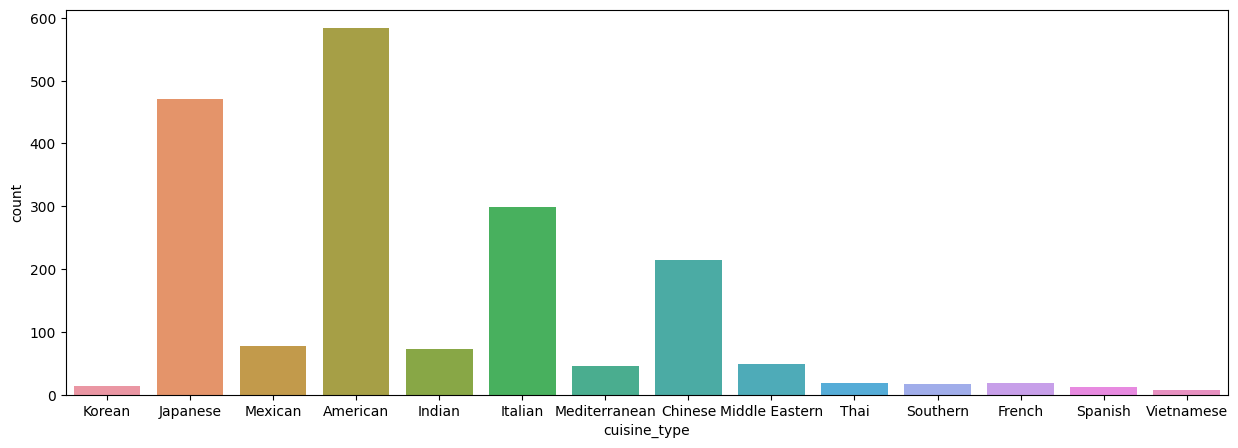

In [43]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') # Create a countplot for cuisine type

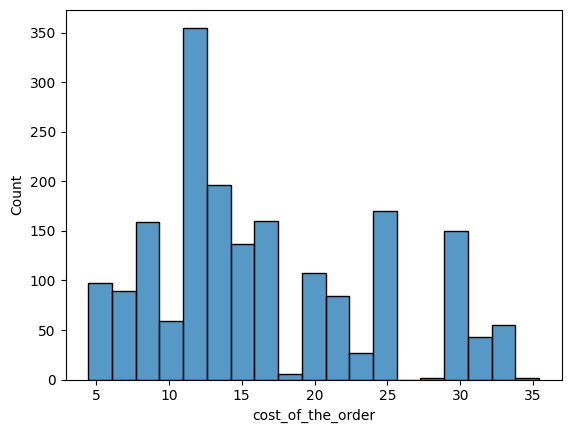

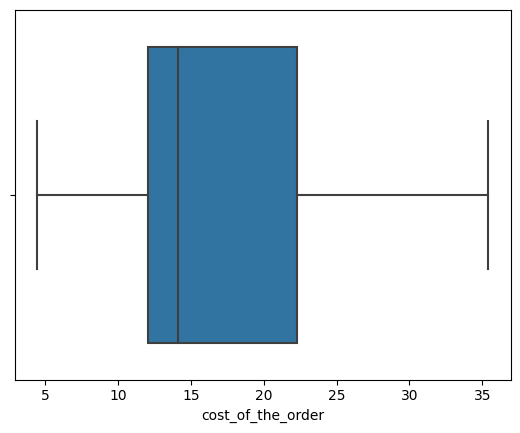

In [44]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

In [48]:
df['day_of_the_week'].nunique

<bound method IndexOpsMixin.nunique of 0       Weekend
1       Weekend
2       Weekday
3       Weekend
4       Weekday
         ...   
1893    Weekend
1894    Weekend
1895    Weekday
1896    Weekday
1897    Weekend
Name: day_of_the_week, Length: 1898, dtype: object>

<Axes: xlabel='day_of_the_week', ylabel='count'>

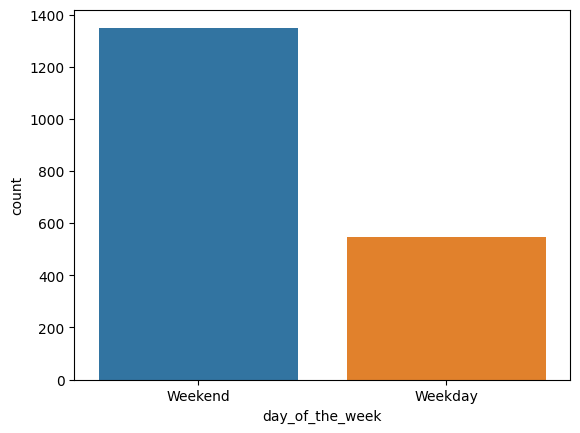

In [52]:
sns.countplot(data = df, x = 'day_of_the_week')

In [56]:
df['rating'].nunique

<bound method IndexOpsMixin.nunique of 0       Not given
1       Not given
2               5
3               3
4               4
          ...    
1893            5
1894            5
1895    Not given
1896            5
1897    Not given
Name: rating, Length: 1898, dtype: object>

<Axes: xlabel='rating', ylabel='count'>

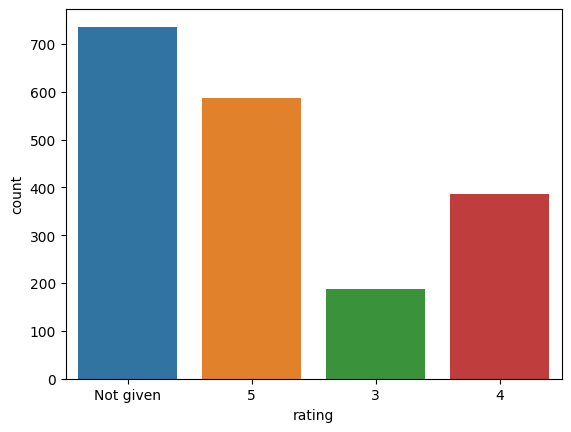

In [54]:
sns.countplot(data = df, x = 'rating')

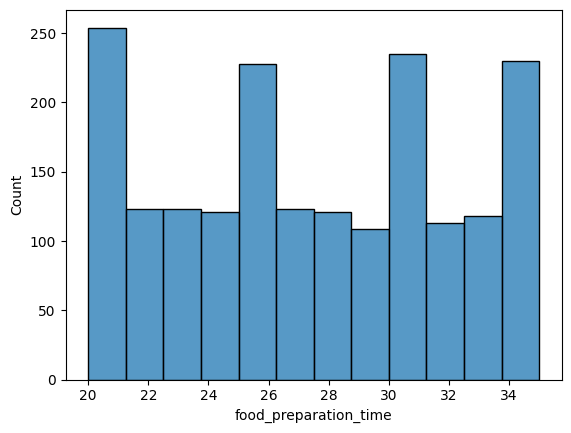

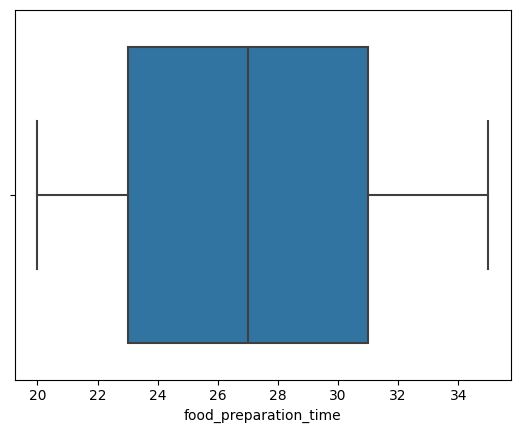

In [57]:
sns.histplot(data=df,x='food_preparation_time') # Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='food_preparation_time') # Complete the code to plot the boxplot for the cost of order
plt.show()

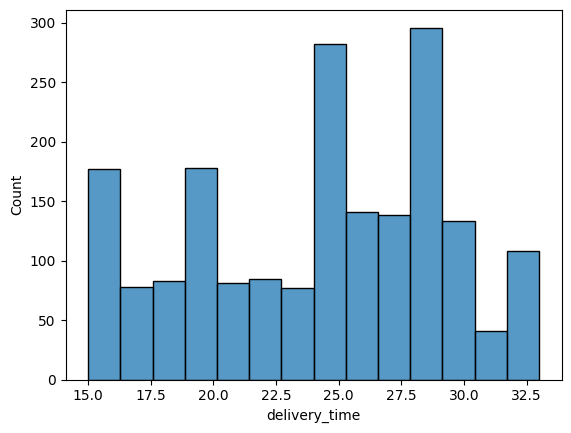

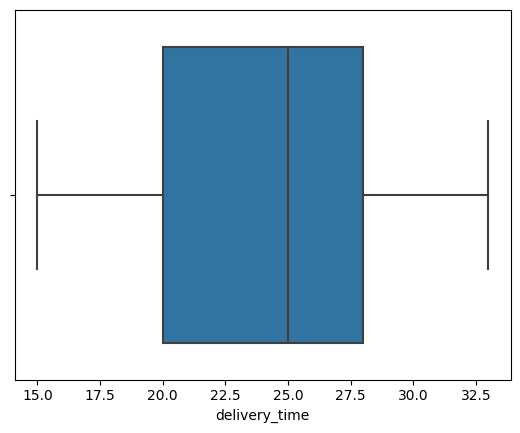

In [58]:
sns.histplot(data=df,x='delivery_time') # Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time')  # Complete the code to plot the boxplot for the delivery time
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [59]:
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [63]:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().idxmax()

'American'

#### Observations:
American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [76]:
dfgreater = df[df['cost_of_the_order']>20]
percentage = (dfgreater.shape[0] / df.shape[0]) * 100 # percentage of orders more 20
print(percentage)

29.24130663856691


#### Observations:

~ 29.24% of the orders cost over $20




### **Question 10**: What is the mean order delivery time? [1 mark]

In [84]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
~24 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [87]:
df['customer_id'].value_counts().head(3) #top 3 value count customer IDs

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
52832    13
47440    10
83287     9

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


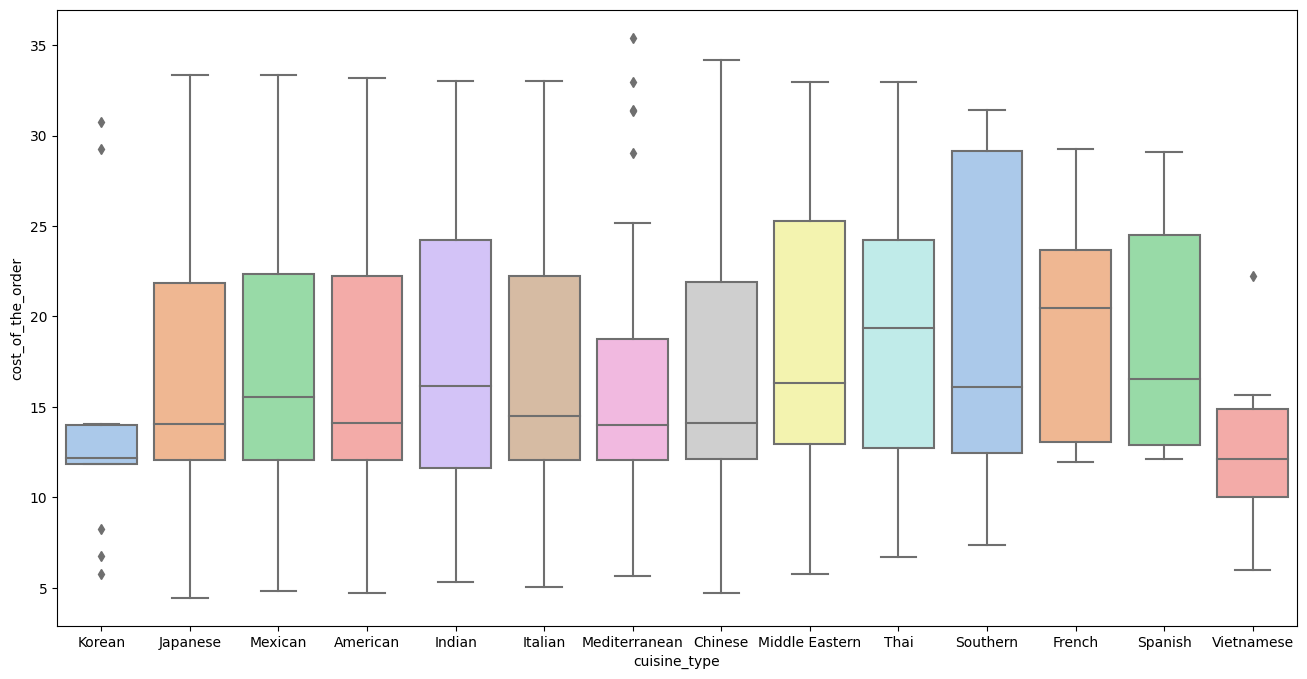

In [113]:
plt.figure(figsize=(16,8))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'pastel')
plt.xticks(rotation = 0)
plt.show()

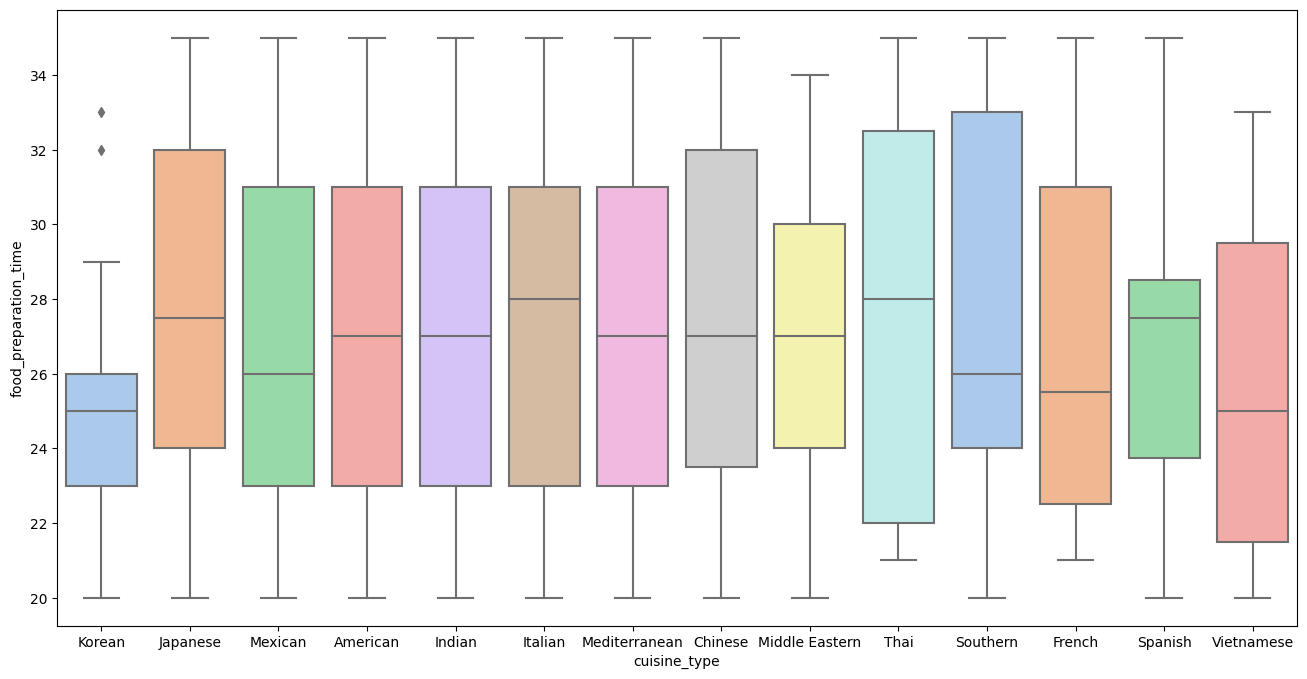

In [111]:
plt.figure(figsize=(15,8))
sns.boxplot(x = "cuisine_type",y = "food_preparation_time", data = df, palette = 'pastel')
plt.xticks(rotation = 0)
plt.show()

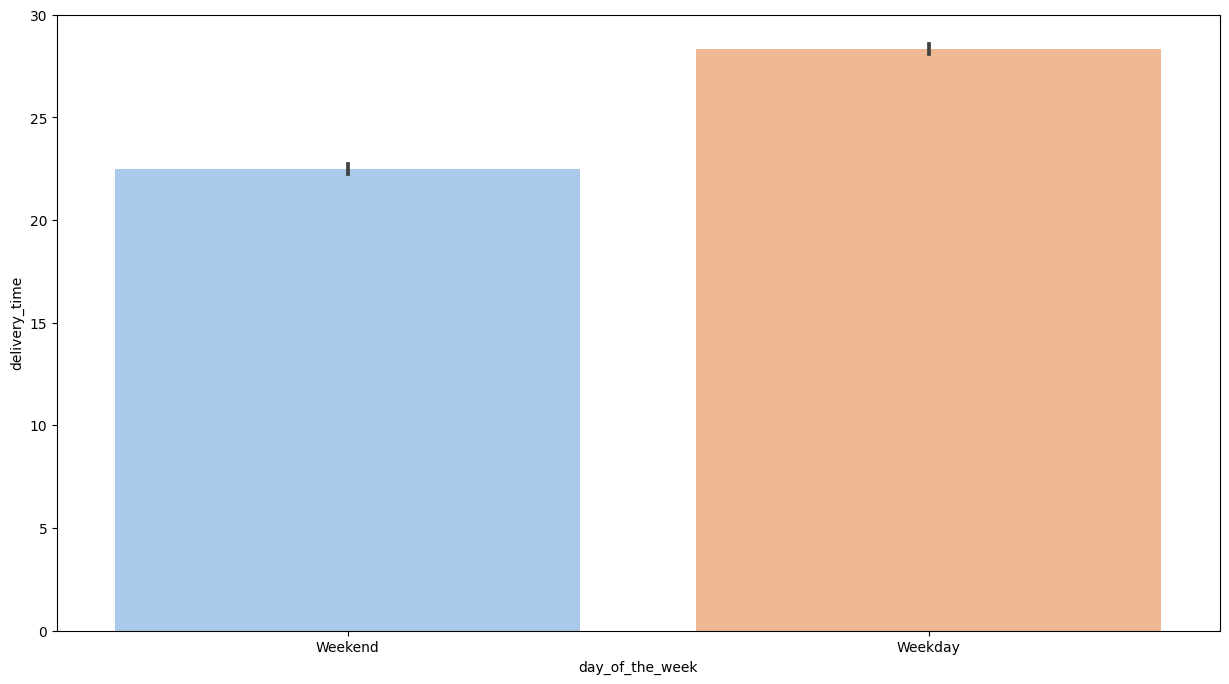

In [116]:
plt.figure(figsize=(15,8))
sns.barplot(x = "day_of_the_week",y = "delivery_time", data = df, palette = 'pastel')
plt.xticks(rotation = 0)
plt.show()

In [117]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

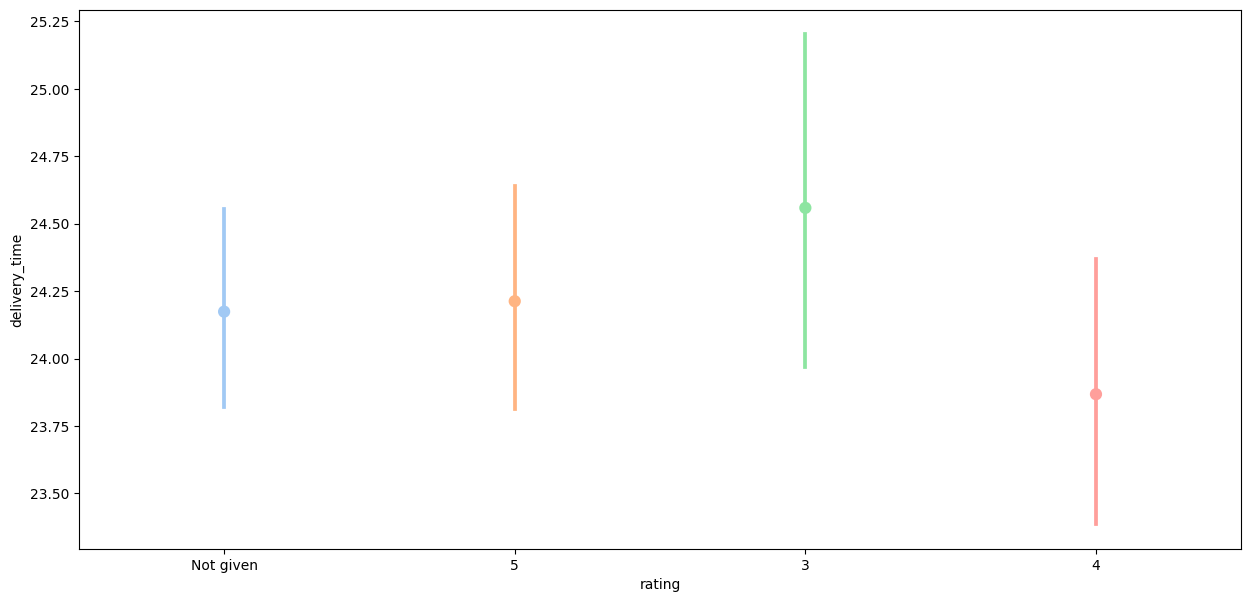

In [121]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df, palette ='pastel')
plt.show()

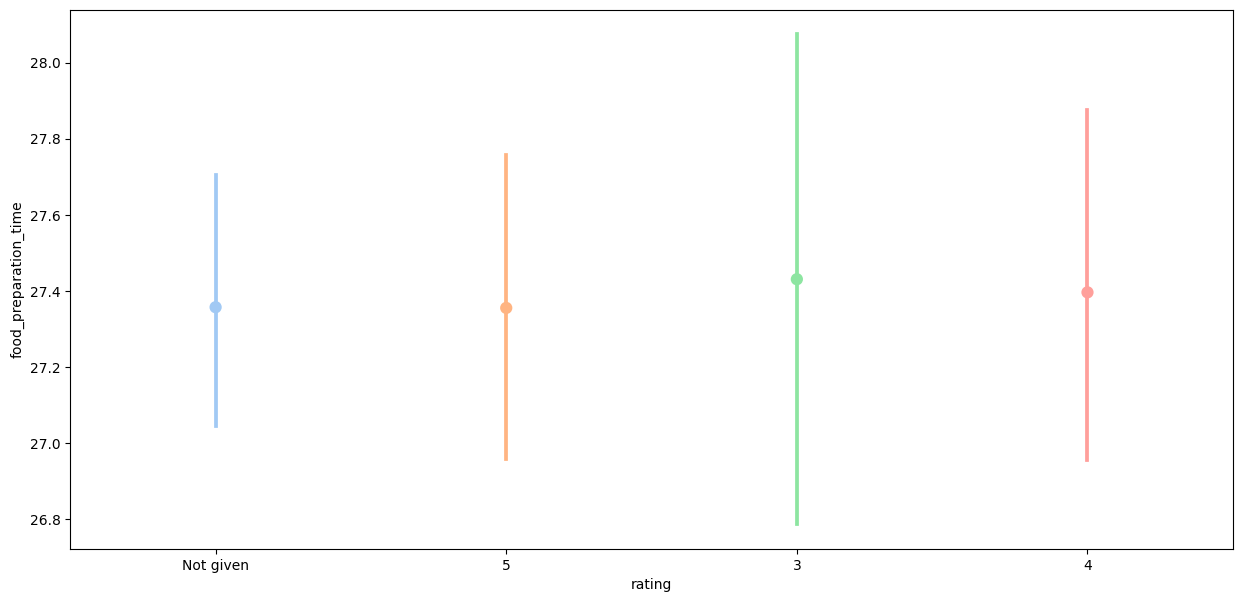

In [122]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df, palette ='pastel')
plt.show()

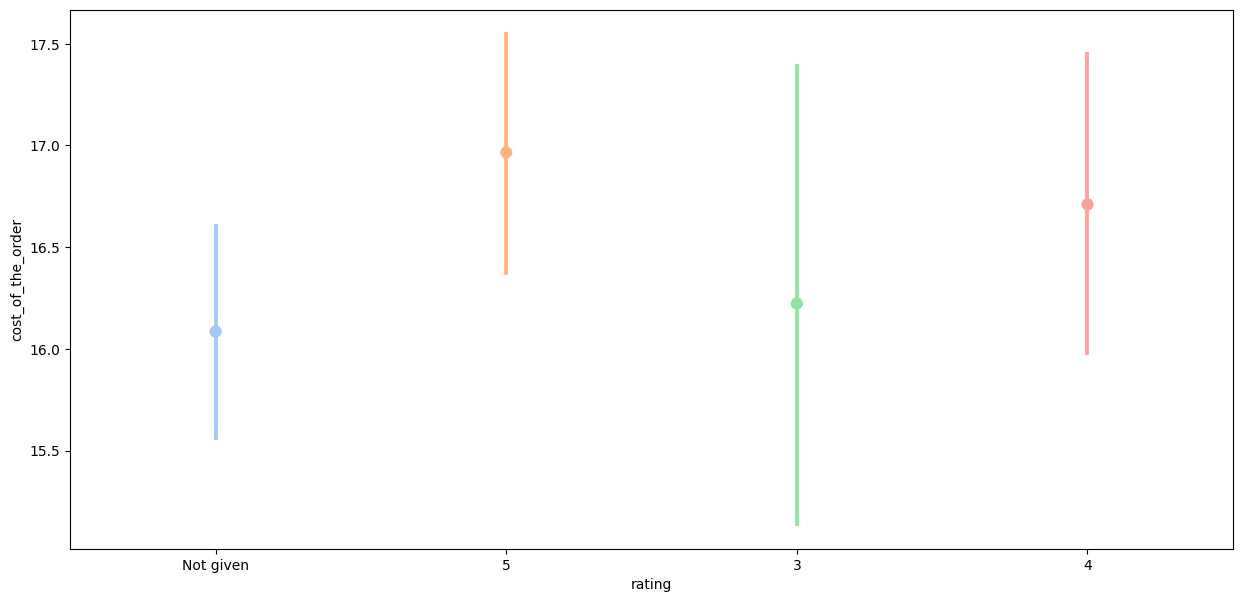

In [123]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df, palette ='pastel')
plt.show()


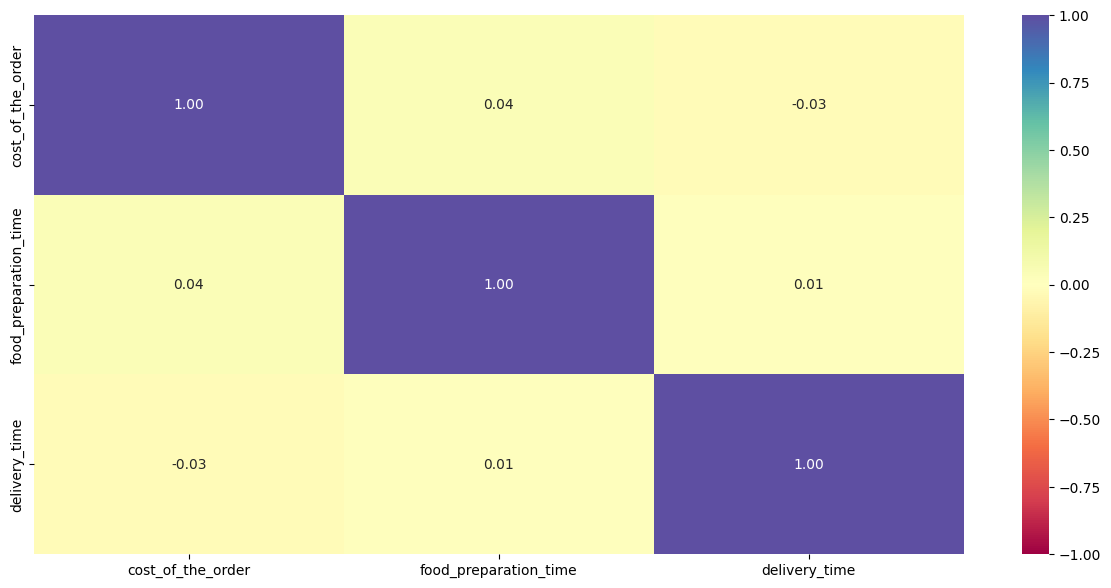

In [124]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [125]:
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [131]:
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() # Complete the code to find the mean rating

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, Blue Ribbon Sushi

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [132]:
# Function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) # Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [134]:
total_rev = df['Revenue'].sum() # Write the appropriate function to get the total revenue
print('Net revenue is ~', round(total_rev, 2), 'dollars')

Net revenue is ~ 6166.3 dollars


#### Observations:
The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [147]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Filter orders with more than 60 minutes of total delivery time
dforder60 = df[df['total_time'] > 60]

# Calculate the percentage of orders that take more than 60 minutes
orderpercentage = (len(dforder60) / len(df)) * 100

print(f"The percentage of orders with more than 60 minutes of total delivery time: {orderpercentage:.2f}%")


The percentage of orders with more than 60 minutes of total delivery time: 10.54%


#### Observations:
10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [150]:
# Get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
      'minutes')
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
      'minutes')



The mean delivery time on weekends is around 28 minutes
The mean delivery time on weekends is around 22 minutes


In [155]:
meanweek = round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean())
meanend = round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean())

print('The mean delivery time varies by around', meanweek - meanend ,'minutes')

The mean delivery time varies by around 6 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Most customers do not rate the restaurants, meaning there is valuable data being lost
* American tends to be the most common cuisine, especially on the weekends
* Delivery times tend to take a good bit longer on the weekends
* Vietnamese and Thai cuisines take the least amount of time to cook and also cost the least; Southern cuisine takes the longest and costs the most
* The highest rated orders took substantially less than the lower ratings

### Recommendations:

*  Create some kind of incentivization for customers to be more likely to give their ratings regarding an order/restaurant
* Perhaps restaurants from less common cuisines could work on some kinds of promotion to compete with the more familiar American cuisine
* Encourage cuisines that take longer to prepare to find ways to reduce time of preparation and thus reduce cost as well
* Have restaurants and drivers focus on time of delivery as the priority because customers gave higher ratings to quicker deliveries(and also because of the previous point)


---